In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from vmdpy import VMD  
import pandas as pd
from scipy.fftpack import fft
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'#将图片保存为矢量图
plt.rcParams['font.sans-serif']=['SimSun'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

In [2]:
#读取数据
path1 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/实验数据集/34_22/' #数据路径
filename0= path1 + '34_22_正常_.csv'
filename1= path1 + '34_22_断齿_.csv'
# filename2= path1 + '57_44_缺齿_.csv'
# filename3= path1 + '57_44_磨损_.csv'
# filename4= path1 + '57_44_裂纹_.csv'
# filename5= path1 + '57_44_偏心_.csv'
filename6= path1 + '34_22_滚动体_.csv'
# filename7= path1 + '57_44_内圈_.csv'
# filename8= path1 + '57_44_外圈_.csv'
filename9= path1 + '34_22_联合_.csv'
data0 = pd.read_csv(filename0,index_col=0)
data1 = pd.read_csv(filename1,index_col=0)
# data2 = pd.read_csv(filename2,index_col=0)
# data3 = pd.read_csv(filename3,index_col=0)
# data4 = pd.read_csv(filename4,index_col=0)
# data5 = pd.read_csv(filename5,index_col=0)
data6 = pd.read_csv(filename6,index_col=0)
# data7 = pd.read_csv(filename7,index_col=0)
# data8 = pd.read_csv(filename8,index_col=0)
data9 = pd.read_csv(filename9,index_col=0)

C:\Users\shamrockyj\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# 采样频率fs
fs = 51200
# 采样周期T
T = 60

In [4]:
# 总样本点数
N = fs*T

#### 获取每个传感器对应信号

In [10]:
data_01 = data0.iloc[:N,1]
data_02 = data0.iloc[:N,2]
data_03 = data0.iloc[:N,3]
data_04 = data0.iloc[:N,4]
data_05 = data0.iloc[:N,5]

In [6]:
data_01

0         -5.396528
1         -5.180059
2         -4.736653
3         -4.194913
4         -3.730393
             ...   
3071995   -1.967119
3071996   -1.665234
3071997   -1.297734
3071998   -0.894942
3071999   -0.670458
Name: A1, Length: 3072000, dtype: float64

In [11]:
data_11 = data1.iloc[:N,1]
data_12 = data1.iloc[:N,2]
data_13 = data1.iloc[:N,3]
data_14 = data1.iloc[:N,4]
data_15 = data1.iloc[:N,5]

In [8]:
data_21 = data2.iloc[:N,1]
data_22 = data2.iloc[:N,2]
data_23 = data2.iloc[:N,3]
data_24 = data2.iloc[:N,4]
data_25 = data2.iloc[:N,5]

NameError: name 'data2' is not defined

In [ ]:
data_31 = data3.iloc[:N,1]
data_32 = data3.iloc[:N,2]
data_33 = data3.iloc[:N,3]
data_34 = data3.iloc[:N,4]
data_35 = data3.iloc[:N,5]

In [ ]:
data_41 = data4.iloc[:N,1]
data_42 = data4.iloc[:N,2]
data_43 = data4.iloc[:N,3]
data_44 = data4.iloc[:N,4]
data_45 = data4.iloc[:N,5]

In [ ]:
data_51 = data5.iloc[:N,1]
data_52 = data5.iloc[:N,2]
data_53 = data5.iloc[:N,3]
data_54 = data5.iloc[:N,4]
data_55 = data5.iloc[:N,5]

In [12]:
data_61 = data6.iloc[:N,1]
data_62 = data6.iloc[:N,2]
data_63 = data6.iloc[:N,3]
data_64 = data6.iloc[:N,4]
data_65 = data6.iloc[:N,5]

In [ ]:
data_71 = data7.iloc[:N,1]
data_72 = data7.iloc[:N,2]
data_73 = data7.iloc[:N,3]
data_74 = data7.iloc[:N,4]
data_75 = data7.iloc[:N,5]

In [ ]:
data_81 = data8.iloc[:N,1]
data_82 = data8.iloc[:N,2]
data_83 = data8.iloc[:N,3]
data_84 = data8.iloc[:N,4]
data_85 = data8.iloc[:N,5]

In [13]:
data_91 = data9.iloc[:N,1]
data_92 = data9.iloc[:N,2]
data_93 = data9.iloc[:N,3]
data_94 = data9.iloc[:N,4]
data_95 = data9.iloc[:N,5]

### 变分模态分解

In [14]:
alpha = 2000    
tau = 0.            
K = 3      
DC = 0             
init = 1           
tol = 1e-6  

"""  
alpha、tau、K、DC、init、tol 六个输入参数的无严格要求；

*alpha 带宽限制 经验取值为 抽样点长度 1.5-2.0 倍，最好设置在1000—3000区间； 

tau 噪声容限 ；

*K 分解模态（IMF）个数：

    选取方法有几种：
    1）根据齿轮箱振动信号的频率结构来看：齿轮振动信号频率一般由输入轴的转频，齿轮副的啮合频率，齿轮的自振频率，
    齿轮的边带频和其他因装配精度造成的频率；轴承振动信号频率组成有点多，建议用下面方法。
    2）枚举法，从1开始依次递增，当中心频率的变化不在变大时就可以停止了；
    3）使用一些辅助算法，比如使用峭度最大原理、能量差值原则等，或者结合一些寻优算法对K值（也可以同时对alpha）寻优；
    
DC 合成信号若无常量，取值为 0；若含常量，则其取值为 1； 

init 初始化 w 值：
    当初始化为 0 时，0初始化；
    当初始化为 1 时，均匀分布初始化； 
    当初始化为 2 时，随机初始化；

tol 控制误差大小常量，决定精度与迭代次数，一般取1e-6至5e-6。

"""

In [15]:
# 定义时序数据集采样长度，最好是采样频率的因数或者电机转频的整数倍
length = 512*2
L = N//length

#### 1.正常

In [16]:
# 创建一个新的列表并赋值
dataA = data_01
dataB = data_02
dataC = data_03
dataD = data_04
dataE = data_05

In [17]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

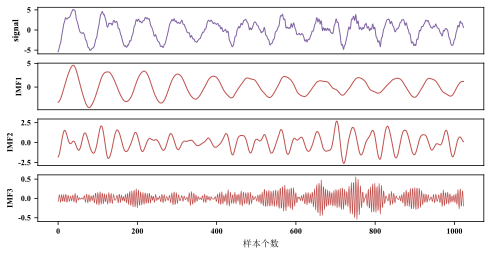

In [18]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [19]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [20]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [21]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [22]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [23]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [24]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,-3.223393,-1.799449,-0.079457,0.408464,-0.807789,-0.033380,-0.378039,0.537325,-0.082805,-3.223393,-1.799449,-0.079457,-3.223393,-1.799449,-0.079457
1,-3.183955,-1.734817,-0.033228,0.388459,-0.732417,0.011466,-0.326944,0.537196,-0.017173,-3.183955,-1.734817,-0.033228,-3.183955,-1.734817,-0.033228
2,-3.107249,-1.610020,0.042477,0.349091,-0.587818,0.046756,-0.229550,0.538167,0.071394,-3.107249,-1.610020,0.042477,-3.107249,-1.610020,0.042477
3,-2.997918,-1.434040,0.096139,0.292896,-0.384445,0.030418,-0.102324,0.536507,0.090919,-2.997918,-1.434040,0.096139,-2.997918,-1.434040,0.096139
4,-2.861671,-1.218332,0.069566,0.221812,-0.139192,-0.022263,0.030681,0.525067,-0.001203,-2.861671,-1.218332,0.069566,-2.861671,-1.218332,0.069566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,-1.850136,0.140396,-0.079847,0.880269,0.070460,0.183272,-0.760782,0.021742,0.067592,-1.850136,0.140396,-0.079847,-1.850136,0.140396,-0.079847
3071996,-1.837827,0.272325,-0.090179,0.908344,0.082990,0.163424,-0.758245,0.041327,0.011675,-1.837827,0.272325,-0.090179,-1.837827,0.272325,-0.090179
3071997,-1.821514,0.389133,-0.036030,0.925329,0.085651,0.053073,-0.748802,0.026762,-0.045818,-1.821514,0.389133,-0.036030,-1.821514,0.389133,-0.036030
3071998,-1.806308,0.477118,0.055694,0.935090,0.084200,-0.089492,-0.736737,0.000576,-0.030623,-1.806308,0.477118,0.055694,-1.806308,0.477118,0.055694


In [25]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/34_22_正常.csv')

#### 2.断齿

In [26]:
# 创建一个新的列表并赋值
dataA = data_11
dataB = data_12
dataC = data_13
dataD = data_14
dataE = data_15

In [27]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

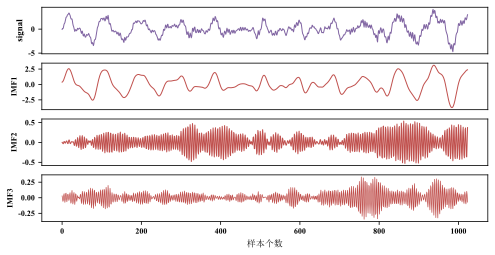

In [28]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [29]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [30]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [31]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [32]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [33]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [34]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,0.383192,0.003626,0.029524,-1.029016,0.763294,0.024035,-0.650289,-0.218888,0.022912,0.383192,0.003626,0.029524,0.383192,0.003626,0.029524
1,0.423271,-0.006841,-0.011156,-1.022741,0.734529,-0.004374,-0.651562,-0.226684,-0.041224,0.423271,-0.006841,-0.011156,0.423271,-0.006841,-0.011156
2,0.498621,-0.027694,-0.057559,-1.011220,0.676237,-0.030508,-0.650785,-0.235942,0.016241,0.498621,-0.027694,-0.057559,0.498621,-0.027694,-0.057559
3,0.607656,-0.031593,-0.039847,-0.995517,0.588444,-0.023167,-0.647375,-0.242300,0.016359,0.607656,-0.031593,-0.039847,0.607656,-0.031593,-0.039847
4,0.747907,-0.003836,0.036790,-0.976491,0.472765,0.014715,-0.641111,-0.241554,-0.032397,0.747907,-0.003836,0.036790,0.747907,-0.003836,0.036790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,-2.080584,-0.083361,-0.315849,1.091017,-0.204861,0.008029,-0.508380,0.123347,0.040350,-2.080584,-0.083361,-0.315849,-2.080584,-0.083361,-0.315849
3071996,-2.217198,-0.245760,0.106059,1.119489,-0.218903,-0.009936,-0.530301,0.065667,-0.002132,-2.217198,-0.245760,0.106059,-2.217198,-0.245760,0.106059
3071997,-2.316614,-0.176939,0.393100,1.141052,-0.227187,-0.007852,-0.557354,-0.006813,-0.028134,-2.316614,-0.176939,0.393100,-2.316614,-0.176939,0.393100
3071998,-2.383565,0.036258,0.132630,1.154641,-0.232755,0.003551,-0.585534,-0.077919,0.045507,-2.383565,0.036258,0.132630,-2.383565,0.036258,0.132630


In [35]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/34_22_断齿.csv')

#### 3.缺齿

In [38]:
# 创建一个新的列表并赋值
dataA = data_21
dataB = data_22
dataC = data_23
dataD = data_24
dataE = data_25

In [39]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

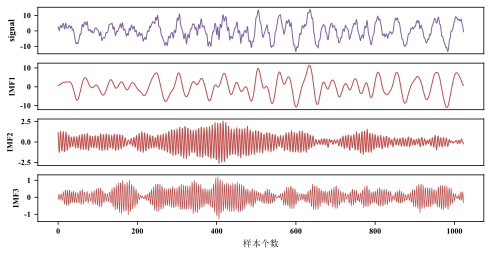

In [40]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [41]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [42]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [43]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [44]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [45]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [46]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,0.734887,1.176698,-0.127007,7.554714,0.966562,-0.696787,1.599952,-1.126646,0.202996,0.734887,1.176698,-0.127007,0.734887,1.176698,-0.127007
1,0.773693,0.253984,0.074059,7.480531,0.938760,-0.638271,1.599349,-0.007968,-0.259964,0.773693,0.253984,0.074059,0.773693,0.253984,0.074059
2,0.837475,-0.875681,0.174643,7.344240,0.896187,-0.510742,1.582154,1.088302,-0.236448,0.837475,-0.875681,0.174643,0.837475,-0.875681,0.174643
3,0.933705,-1.280515,0.062731,7.146151,0.836967,-0.326886,1.516133,1.041495,0.266518,0.933705,-1.280515,0.062731,0.933705,-1.280515,0.062731
4,1.067251,-0.617190,-0.100708,6.878247,0.748158,-0.117781,1.366269,-0.073531,0.283436,1.067251,-0.617190,-0.100708,1.067251,-0.617190,-0.100708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,-2.423973,1.051027,0.323133,1.321874,-3.278061,-0.187700,-1.444065,-0.263172,-0.246224,-2.423973,1.051027,0.323133,-2.423973,1.051027,0.323133
3071996,-2.144819,2.068045,-0.640643,2.085368,-3.240275,-0.223786,-1.993161,-0.303236,0.071850,-2.144819,2.068045,-0.640643,-2.144819,2.068045,-0.640643
3071997,-1.910775,1.455217,-0.828665,2.746247,-3.182064,-0.082669,-2.438969,-0.149562,0.261064,-1.910775,1.455217,-0.828665,-1.910775,1.455217,-0.828665
3071998,-1.749720,-0.324552,-0.074030,3.243155,-3.119667,0.075479,-2.747947,0.089968,0.086596,-1.749720,-0.324552,-0.074030,-1.749720,-0.324552,-0.074030


In [47]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/57_44/57_44_缺齿.csv')

#### 4.磨损

In [48]:
# 创建一个新的列表并赋值
dataA = data_31
dataB = data_32
dataC = data_33
dataD = data_34
dataE = data_35

In [49]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

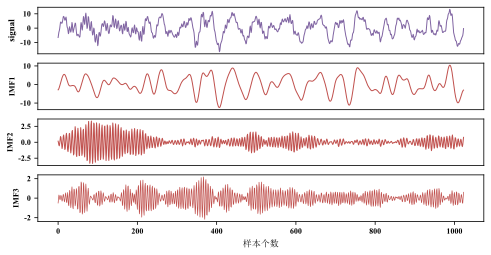

In [50]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [51]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [52]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [53]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [54]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [55]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [56]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,-2.879991,0.173407,-0.497185,2.950790,0.019156,-0.121878,-8.325809,-0.114112,0.366462,-2.879991,0.173407,-0.497185,-2.879991,0.173407,-0.497185
1,-2.632198,-0.086243,-0.038820,2.981743,0.052714,-0.130091,-8.216201,-0.287817,-0.074474,-2.632198,-0.086243,-0.038820,-2.632198,-0.086243,-0.038820
2,-2.180163,-0.433271,0.319746,3.053874,0.127593,0.006911,-7.973254,-0.583804,-0.414834,-2.180163,-0.433271,0.319746,-2.180163,-0.433271,0.319746
3,-1.573175,-0.552693,0.219156,3.155298,0.221922,0.229225,-7.593335,-0.957592,-0.281304,-1.573175,-0.552693,0.219156,-1.573175,-0.552693,0.219156
4,-0.852799,-0.219423,-0.087427,3.253850,0.288830,0.252191,-7.111888,-1.397798,0.103114,-0.852799,-0.219423,-0.087427,-0.852799,-0.219423,-0.087427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,1.328981,0.804919,0.113137,1.630266,0.441737,0.091821,-4.238049,-1.221380,-0.069870,1.328981,0.804919,0.113137,1.328981,0.804919,0.113137
3071996,1.679894,1.731838,1.564379,1.540075,0.182131,0.193084,-4.370186,-2.125502,-0.317948,1.679894,1.731838,1.564379,1.679894,1.731838,1.564379
3071997,1.997367,2.568763,1.450207,1.431662,-0.099013,0.106393,-4.477882,-2.885562,0.160276,1.997367,2.568763,1.450207,1.997367,2.568763,1.450207
3071998,2.250550,3.218300,0.042052,1.334631,-0.337408,-0.066416,-4.555562,-3.436549,0.289688,2.250550,3.218300,0.042052,2.250550,3.218300,0.042052


In [57]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/57_44/57_44_磨损.csv')

#### 5.裂纹

In [58]:
# 创建一个新的列表并赋值
dataA = data_41
dataB = data_42
dataC = data_43
dataD = data_44
dataE = data_45

In [59]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

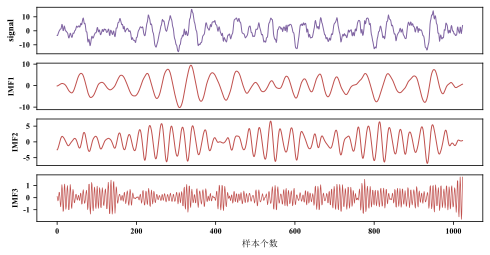

In [60]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [61]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [62]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [63]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [64]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [65]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [66]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,-0.155597,-2.505481,0.090314,4.110319,2.237295,-0.595461,-0.090951,-1.668319,-0.611353,-0.155597,-2.505481,0.090314,-0.155597,-2.505481,0.090314
1,-0.115323,-2.361480,-0.105921,4.133700,2.163922,-0.465210,-0.157031,-1.645929,-0.089895,-0.115323,-2.361480,-0.105921,-0.115323,-2.361480,-0.105921
2,-0.037466,-2.085142,-0.265336,4.156293,1.991031,-0.258376,-0.286703,-1.605982,0.513544,-0.037466,-2.085142,-0.265336,-0.037466,-2.085142,-0.265336
3,0.063644,-1.708418,-0.176321,4.159642,1.703671,-0.032805,-0.471138,-1.555790,0.693979,0.063644,-1.708418,-0.176321,0.063644,-1.708418,-0.176321
4,0.175960,-1.265175,0.146089,4.141762,1.313325,0.175803,-0.676619,-1.489233,0.324303,0.175960,-1.265175,0.146089,0.175960,-1.265175,0.146089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,-7.212416,0.157639,0.442627,0.428677,-0.186182,1.850813,3.631053,0.410216,-0.095958,-7.212416,0.157639,0.442627,-7.212416,0.157639,0.442627
3071996,-7.819969,0.061260,0.093446,0.375303,-0.288871,3.168918,3.591866,0.270326,0.001541,-7.819969,0.061260,0.093446,-7.819969,0.061260,0.093446
3071997,-8.295862,-0.099212,-0.307352,0.341373,-0.170576,4.256194,3.560825,0.096769,0.154650,-8.295862,-0.099212,-0.307352,-8.295862,-0.099212,-0.307352
3071998,-8.607954,-0.180281,-0.229132,0.324059,0.087548,5.033188,3.531057,-0.080412,0.113127,-8.607954,-0.180281,-0.229132,-8.607954,-0.180281,-0.229132


In [67]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/57_44/57_44_裂纹.csv')

#### 6.偏心

In [68]:
# 创建一个新的列表并赋值
dataA = data_51
dataB = data_52
dataC = data_53
dataD = data_54
dataE = data_55

In [69]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

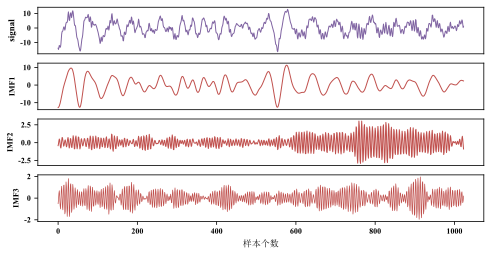

In [70]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [71]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [72]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [73]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [74]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [75]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [76]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,-12.759780,-0.420919,-0.505356,0.042940,1.693221,0.090206,-3.827782,-1.109619,-0.500447,-12.759780,-0.420919,-0.505356,-12.759780,-0.420919,-0.505356
1,-12.616156,-0.165968,-0.127389,0.061016,1.691454,-0.034475,-3.786158,-1.008591,0.017113,-12.616156,-0.165968,-0.127389,-12.616156,-0.165968,-0.127389
2,-12.300885,0.244576,0.447015,0.103216,1.689424,-0.124159,-3.699868,-0.814207,0.508754,-12.300885,0.244576,0.447015,-12.300885,0.244576,0.447015
3,-11.817233,0.505807,0.687342,0.163004,1.669153,-0.097757,-3.581263,-0.562661,0.425212,-11.817233,0.505807,0.687342,-11.817233,0.505807,0.687342
4,-11.177330,0.357002,0.209705,0.228671,1.603159,-0.004195,-3.439512,-0.290676,-0.137134,-11.177330,0.357002,0.209705,-11.177330,0.357002,0.209705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,4.462472,-0.294274,-0.559087,6.123296,-4.569835,0.544565,-0.472707,-0.378652,0.620654,4.462472,-0.294274,-0.559087,4.462472,-0.294274,-0.559087
3071996,5.216700,-1.267135,-0.109745,6.349195,-5.751568,-0.245034,-0.362952,-0.097476,-0.283439,5.216700,-1.267135,-0.109745,5.216700,-1.267135,-0.109745
3071997,5.771773,-1.077508,0.349098,6.550197,-6.635008,-0.718137,-0.257717,0.229089,-0.876206,5.771773,-1.077508,0.349098,5.771773,-1.077508,0.349098
3071998,6.126245,-0.012486,0.167193,6.704148,-7.215284,-0.178933,-0.162992,0.529818,-0.240144,6.126245,-0.012486,0.167193,6.126245,-0.012486,0.167193


In [77]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/57_44/57_44_偏心.csv')

#### 7.滚动体

In [36]:
# 创建一个新的列表并赋值
dataA = data_61
dataB = data_62
dataC = data_63
dataD = data_64
dataE = data_65

In [37]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

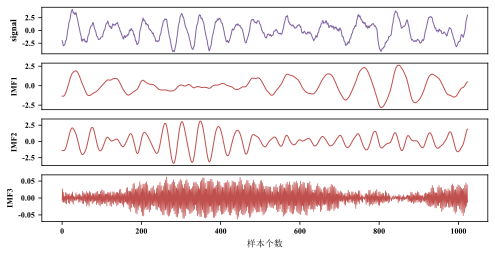

In [38]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [39]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [40]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [41]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [42]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [43]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [44]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,-1.341874,-1.370835,-0.006417,0.147850,0.707685,-0.024708,-1.008305,0.789613,-0.052733,-1.341874,-1.370835,-0.006417,-1.341874,-1.370835,-0.006417
1,-1.347243,-1.385839,0.027368,0.129484,0.701393,0.007869,-1.008402,0.720630,0.030460,-1.347243,-1.385839,0.027368,-1.347243,-1.385839,0.027368
2,-1.352971,-1.408638,-0.012584,0.092886,0.686776,0.034228,-1.004776,0.592389,0.080933,-1.352971,-1.408638,-0.012584,-1.352971,-1.408638,-0.012584
3,-1.349836,-1.426196,-0.011658,0.039407,0.661246,0.016206,-0.995843,0.416397,0.004113,-1.349836,-1.426196,-0.011658,-1.349836,-1.426196,-0.011658
4,-1.329894,-1.426371,0.016440,-0.028854,0.621504,-0.031223,-0.981380,0.205981,-0.097792,-1.329894,-1.426371,0.016440,-1.329894,-1.426371,0.016440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,-1.258154,-0.532231,0.067364,-1.044409,0.248744,-0.067989,0.003189,0.015396,0.016696,-1.258154,-0.532231,0.067364,-1.258154,-0.532231,0.067364
3071996,-1.201623,-0.391330,0.002390,-1.073897,0.339276,-0.003828,-0.010053,0.047899,0.061243,-1.201623,-0.391330,0.002390,-1.201623,-0.391330,0.002390
3071997,-1.152563,-0.271841,-0.067723,-1.098002,0.408133,0.065389,-0.020399,0.074487,0.090463,-1.152563,-0.271841,-0.067723,-1.152563,-0.271841,-0.067723
3071998,-1.115345,-0.183893,-0.026182,-1.115513,0.453807,0.028549,-0.026661,0.094255,0.107885,-1.115345,-0.183893,-0.026182,-1.115345,-0.183893,-0.026182


In [45]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/34_22_滚动体.csv')

#### 8.内圈

In [88]:
# 创建一个新的列表并赋值
dataA = data_71
dataB = data_72
dataC = data_73
dataD = data_74
dataE = data_75

In [89]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

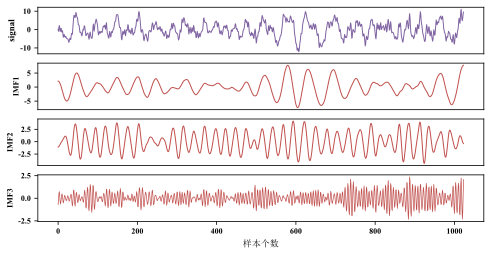

In [90]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [91]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [92]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [93]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [94]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [95]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [96]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,2.151027,-1.098944,-0.685591,-4.777231,-1.515025,-0.130134,0.049149,0.384188,-1.928526,2.151027,-1.098944,-0.685591,2.151027,-1.098944,-0.685591
1,2.084289,-1.061521,-0.175299,-4.660746,-1.336563,-0.099295,0.040978,0.343100,-1.760970,2.084289,-1.061521,-0.175299,2.084289,-1.061521,-0.175299
2,1.975899,-0.962081,0.491366,-4.429849,-0.998377,-0.006145,0.029116,0.269633,-1.430856,1.975899,-0.962081,0.491366,1.975899,-0.962081,0.491366
3,1.805220,-0.832619,0.735178,-4.116694,-0.566793,0.077940,0.006827,0.163058,-0.968156,1.805220,-0.832619,0.735178,1.805220,-0.832619,0.735178
4,1.554227,-0.704779,0.329737,-3.756419,-0.118161,0.091799,-0.018345,0.042330,-0.394375,1.554227,-0.704779,0.329737,1.554227,-0.704779,0.329737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,-2.813113,-0.159924,-0.549394,3.483476,-2.303619,-0.016324,-1.584121,-1.331096,-0.367420,-2.813113,-0.159924,-0.549394,-2.813113,-0.159924,-0.549394
3071996,-2.552855,-0.043175,-0.251264,3.558432,-3.097459,-0.116200,-1.571599,-1.764855,-0.081686,-2.552855,-0.043175,-0.251264,-2.552855,-0.043175,-0.251264
3071997,-2.321348,0.153873,0.112542,3.618649,-3.724281,-0.085859,-1.533209,-2.020098,0.253743,-2.321348,0.153873,0.112542,-2.321348,0.153873,0.112542
3071998,-2.146937,0.367673,0.293486,3.657881,-4.160961,0.024481,-1.486115,-2.137268,0.577814,-2.146937,0.367673,0.293486,-2.146937,0.367673,0.293486


In [97]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/57_44/57_44_内圈.csv')

#### 9.外圈

In [98]:
# 创建一个新的列表并赋值
dataA = data_81
dataB = data_82
dataC = data_83
dataD = data_84
dataE = data_85

In [99]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

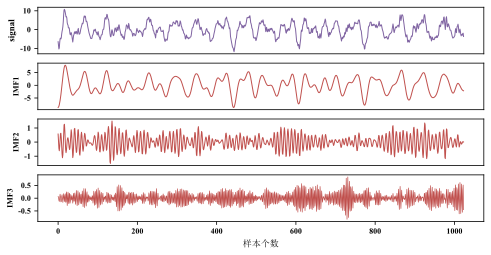

In [100]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [101]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [102]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [103]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [104]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [105]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [106]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,-8.702022,0.571984,0.065121,-12.317280,3.394385,-0.079015,-2.056218,-0.576863,0.853865,-8.702022,0.571984,0.065121,-8.702022,0.571984,0.065121
1,-8.548146,0.106869,0.038180,-12.201446,3.322866,-0.033278,-1.999814,-0.538379,0.769175,-8.548146,0.106869,0.038180,-8.548146,0.106869,0.038180
2,-8.206151,-0.435523,-0.086645,-11.981707,3.163355,-0.013697,-1.891324,-0.469637,0.599575,-8.206151,-0.435523,-0.086645,-8.206151,-0.435523,-0.086645
3,-7.644944,-0.614987,-0.129227,-11.663896,2.904879,-0.034246,-1.742841,-0.389477,0.343301,-7.644944,-0.614987,-0.129227,-7.644944,-0.614987,-0.129227
4,-6.879514,-0.312538,0.031152,-11.254696,2.535955,-0.050376,-1.559046,-0.308048,0.019808,-6.879514,-0.312538,0.031152,-6.879514,-0.312538,0.031152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,4.915429,0.045405,0.155636,-4.341923,-1.242138,0.154735,2.753556,0.468379,0.643744,4.915429,0.045405,0.155636,4.915429,0.045405,0.155636
3071996,5.566740,-0.001781,0.261501,-4.324007,-1.648434,-0.277128,2.885075,1.308141,1.004652,5.566740,-0.001781,0.261501,5.566740,-0.001781,0.261501
3071997,6.075783,-0.028744,-0.191067,-4.298063,-1.958172,-0.376571,2.977835,2.000301,0.626092,6.075783,-0.028744,-0.191067,6.075783,-0.028744,-0.191067
3071998,6.431730,0.027011,-0.248031,-4.273389,-2.165204,-0.039619,3.033508,2.485771,-0.217310,6.431730,0.027011,-0.248031,6.431730,0.027011,-0.248031


In [107]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/57_44/57_44_外圈.csv')

#### 10.联合

In [46]:
# 创建一个新的列表并赋值
dataA = data_91
dataB = data_92
dataC = data_93
dataD = data_94
dataE = data_95

In [47]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a1']
data_b1.columns = ['b1']
data_c1.columns = ['c1']
data_1 = data_a1.join(data_b1).join(data_c1)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

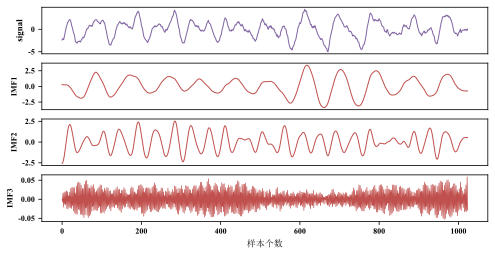

In [48]:
color = ['#c0504d','#bf7334','#9bbb59','#71c16f','#4bacc6','#4f81bd','#8064a2']
plt.figure(figsize=(8,6))
plt.subplot(611)
plt.plot(dataA.iloc[0:length],linewidth = 1,color=color[6])
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.ylabel('signal',fontproperties = 'Times New Roman', size = 9)
plt.xticks([])
plt.subplot(612)
plt.plot(data_1.iloc[0:length,0],linewidth = 1,color=color[0])
plt.ylabel('IMF1',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(613)
plt.plot(data_1.iloc[0:length,1],linewidth = 1,color=color[0])
plt.ylabel('IMF2',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
plt.xticks([])
plt.subplot(614)
plt.plot(data_1.iloc[0:length,2],linewidth = 0.7,color=color[0])
plt.ylabel('IMF3',fontproperties = 'Times New Roman', size = 8)
plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(615)
# plt.plot(data_1.iloc[0:length,3],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF4',fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.xticks([])
# plt.subplot(616)
# plt.plot(data_1.iloc[0:length,4],linewidth = 0.7,color=color[0])
# plt.ylabel('IMF5',fontproperties = 'Times New Roman', size = 8)
plt.xlabel('样本个数', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 8)
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/正常NI2.png', dpi=500, bbox_inches='tight') 

In [49]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataB[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a2']
data_b1.columns = ['b2']
data_c1.columns = ['c2']
data_2 = data_a1.join(data_b1).join(data_c1)

In [50]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataC[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a3']
data_b1.columns = ['b3']
data_c1.columns = ['c3']
data_3 = data_a1.join(data_b1).join(data_c1)

In [51]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a4']
data_b1.columns = ['b4']
data_c1.columns = ['c4']
data_4 = data_a1.join(data_b1).join(data_c1)

In [52]:
# 创建5个空列表存放五个IMF的值
data_a1 = []
data_b1 = []
data_c1 = []

for i in range(L):
    u, u_hat, omega = VMD(dataA[length*i:length*(i+1)], alpha, tau, K, DC, init, tol)  #求取变分模态
    data_a1[length*i:length*(i+1)]= u[0,:]
    data_b1[length*i:length*(i+1)]= u[1,:]
    data_c1[length*i:length*(i+1)]= u[2,:]
data_a1 = pd.DataFrame(data_a1) 
data_b1 = pd.DataFrame(data_b1)
data_c1 = pd.DataFrame(data_c1)
data_a1.columns = ['a5']
data_b1.columns = ['b5']
data_c1.columns = ['c5']
data_5 = data_a1.join(data_b1).join(data_c1)

In [53]:
data = data_1.join(data_2).join(data_3).join(data_4).join(data_5)

In [54]:
data

,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5
0,0.289333,-2.575217,0.000711,-0.918211,0.103886,0.108962,-0.586190,-0.240003,0.235838,0.289333,-2.575217,0.000711,0.289333,-2.575217,0.000711
1,0.286838,-2.521144,-0.007275,-0.929208,-0.031838,-0.086466,-0.572943,-0.213862,-0.093062,0.286838,-2.521144,-0.007275,0.286838,-2.521144,-0.007275
2,0.278211,-2.417976,0.015642,-0.949010,-0.129172,-0.124416,-0.541691,-0.158956,-0.293682,0.278211,-2.417976,0.015642,0.278211,-2.417976,0.015642
3,0.265379,-2.265502,-0.003505,-0.975570,-0.061179,0.059635,-0.494081,-0.084079,-0.110660,0.265379,-2.265502,-0.003505,0.265379,-2.265502,-0.003505
4,0.254255,-2.060077,-0.020800,-1.008253,0.090222,0.131342,-0.440664,-0.011326,0.183079,0.254255,-2.060077,-0.020800,0.254255,-2.060077,-0.020800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071995,-1.445061,0.449455,-0.013149,0.866815,-0.514094,0.026868,-0.509564,0.133351,0.105714,-1.445061,0.449455,-0.013149,-1.445061,0.449455,-0.013149
3071996,-1.486393,0.416034,-0.005948,0.933141,-0.623922,-0.051753,-0.521906,0.276499,-0.040260,-1.486393,0.416034,-0.005948,-1.486393,0.416034,-0.005948
3071997,-1.519196,0.386769,0.006180,0.987759,-0.701267,-0.079414,-0.524933,0.405278,-0.156718,-1.519196,0.386769,0.006180,-1.519196,0.386769,0.006180
3071998,-1.541409,0.365789,0.003509,1.028077,-0.747977,-0.006845,-0.521675,0.505380,-0.052195,-1.541409,0.365789,0.003509,-1.541409,0.365789,0.003509


In [55]:
data.to_csv('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/34_22_联合.csv')